In [7]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as T
from IPython.display import clear_output
from PIL import Image
from matplotlib import cm
from time import perf_counter
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from tqdm import tqdm
from torch.optim import Optimizer

warnings.filterwarnings('ignore')

plt.rc('font', size=30)

In [2]:
mnist_train = MNIST(
    "../datasets/mnist",
    train=True,
    download=True
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../datasets/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../datasets/mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../datasets/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../datasets/mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../datasets/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../datasets/mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../datasets/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../datasets/mnist/MNIST/raw



In [3]:
mnist_train = MNIST(
    "../datasets/mnist",
    train=True,
    download=True,
    transform=T.ToTensor()
)
mnist_valid = MNIST(
    "../datasets/mnist",
    train=False,
    download=True,
    transform=T.ToTensor()
)

In [4]:
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
valid_loader = DataLoader(mnist_valid, batch_size=64, shuffle=False)

In [28]:
from sklearn.metrics import accuracy_score
@torch.inference_mode()
def evaluate(model: nn.Module, data_loader: DataLoader, loss_fn):
    model.eval()
    total_loss = 0
    total_acc = 0
    for x_batch, y_batch in data_loader:
        output = model(x_batch)
        loss = loss_fn(output, y_batch)
        total_loss += loss
        total_acc += accuracy_score(y_batch, output.argmax(axis=1))
    return total_loss / len(data_loader), total_acc / len(data_loader)


In [29]:
def train(model: nn.Module, data_loader: DataLoader, optimizer: Optimizer, loss_fn):
    total_loss = 0
    model.train()
    for x_batch, y_batch in data_loader:
        optimizer.zero_grad()
        # forward
        output = model(x_batch)

        loss = loss_fn(output, y_batch)
        loss.backward()
        total_loss += loss.item()

        # print(round(loss.item(), 5))
        optimizer.step()
    return total_loss / len(data_loader)


In [30]:
def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    valid_accuracy: list[float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')
    plt.legend()
    plt.grid()

    plt.show()

    plt.figure(figsize=(16, 8))

    plt.title(title + ' accuracy')

    plt.plot(valid_accuracy)
    plt.grid()

    plt.show()

In [58]:
first_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 256),
    nn.ReLU(),
    nn.Linear(256, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

optimizer = torch.optim.Adam(first_model.parameters(), lr=1e-4)

loss_fn = nn.CrossEntropyLoss()

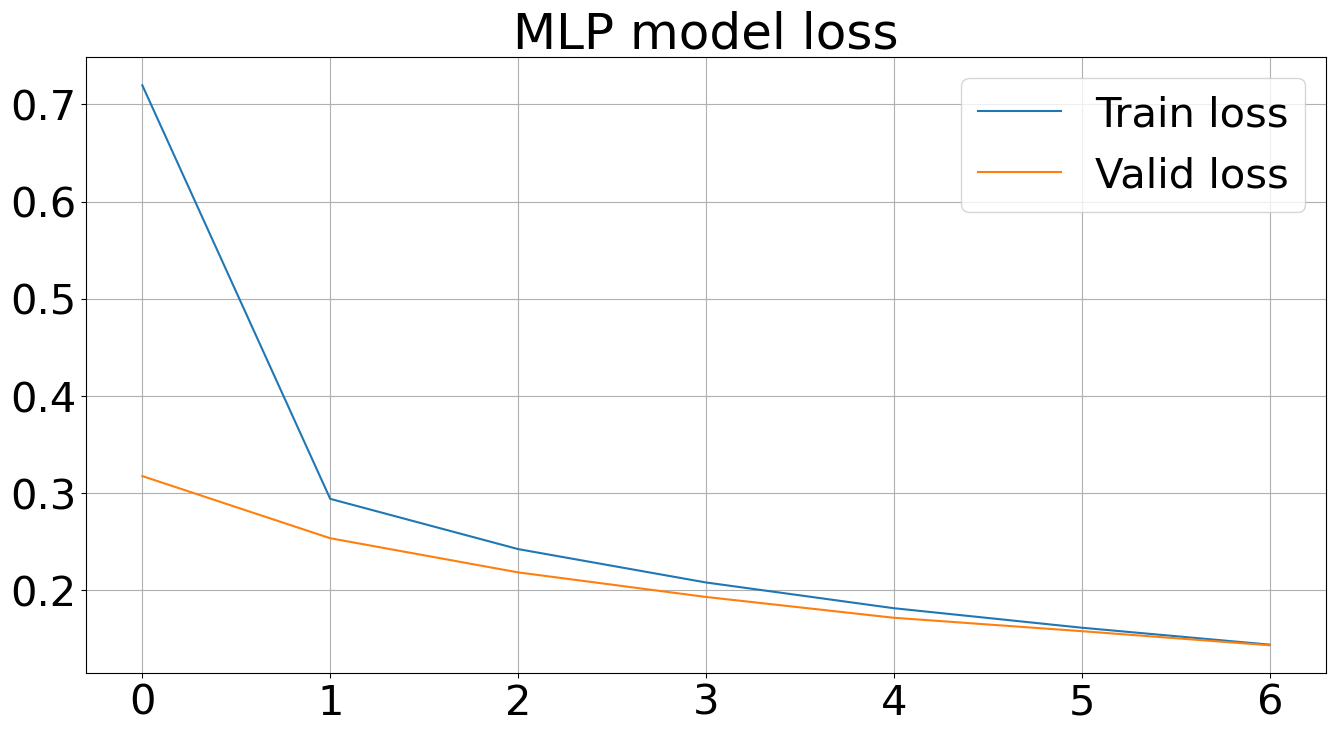

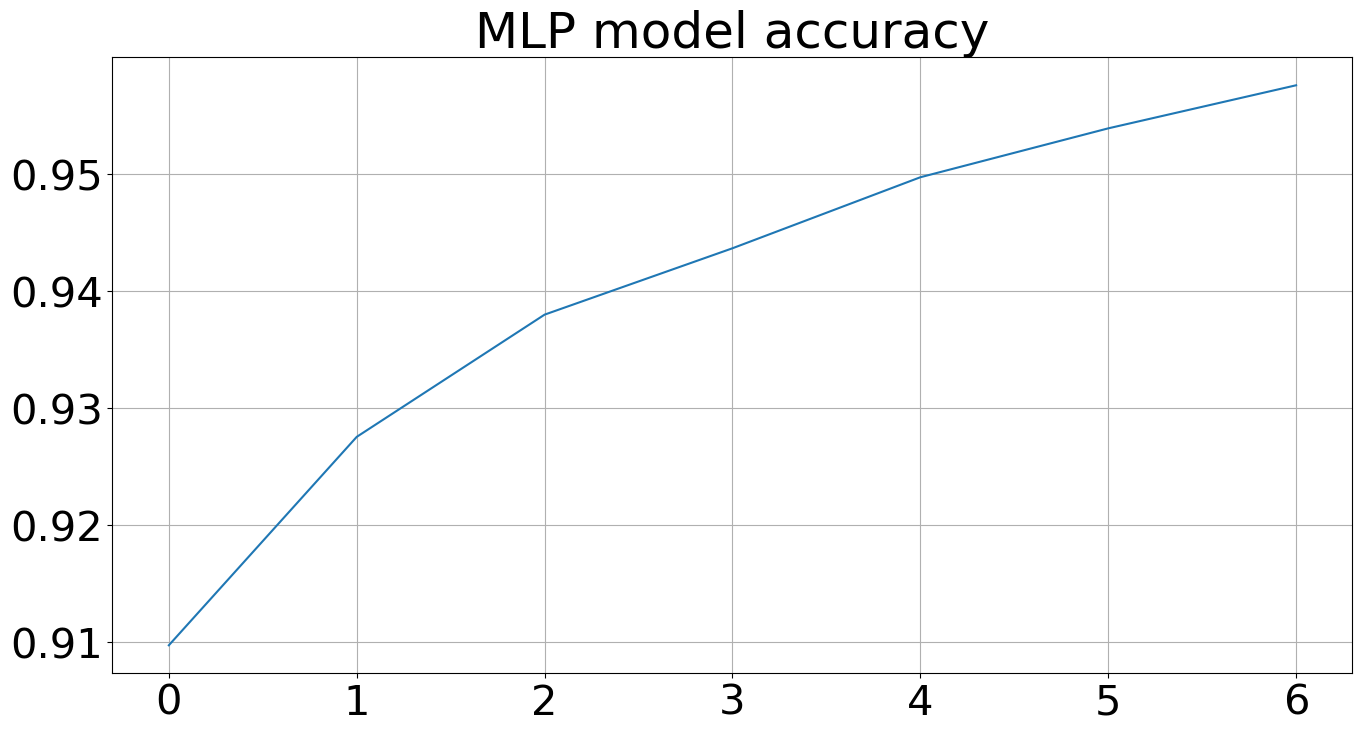

Total training and evaluation time 78.59117


In [59]:
num_epochs = 7

train_loss_history, valid_loss_history = [], []
valid_accuracy_history = []

start = perf_counter()

for epoch in range(num_epochs):
    train_loss = train(first_model, train_loader, optimizer, loss_fn)

    valid_loss, valid_accuracy = evaluate(first_model, valid_loader, loss_fn)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    valid_accuracy_history.append(valid_accuracy)
    
    clear_output()

    plot_stats(train_loss_history, valid_loss_history, valid_accuracy_history, 'MLP model')
    
print(f'Total training and evaluation time {perf_counter() - start:.5f}')

In [61]:
import os

#to get the current working directory
directory = os.getcwd()

print(directory)

torch.save(first_model.state_dict(), './first_model.pth')



/home/bunsan/study/ML_Karpov_course/3 module/3rd lesson 3 module


In [ ]:
# Load
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH))
# model.eval()

In [50]:
second_model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),
    nn.Linear(4 * 4 * 64, 256),
    nn.ReLU(),
    nn.Linear(256, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

optimizer = torch.optim.Adam(second_model.parameters(), lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

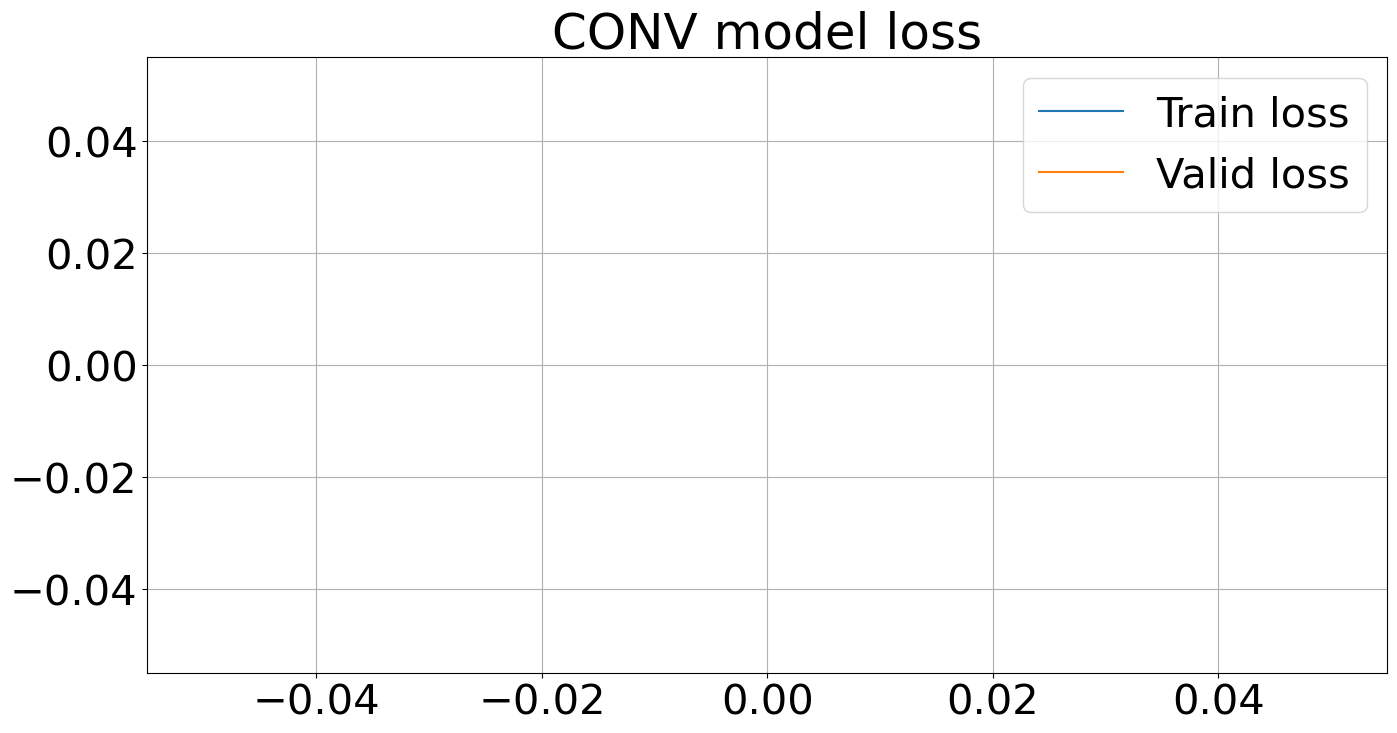

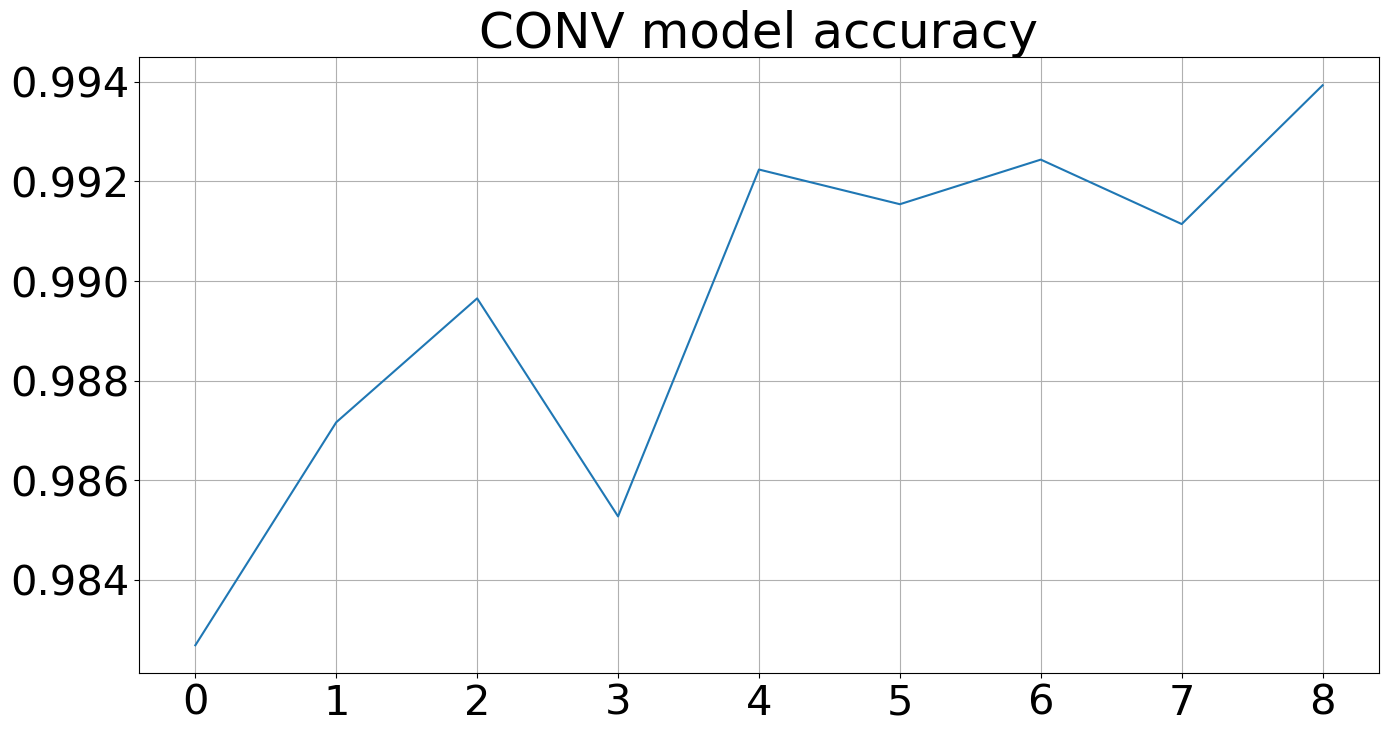

KeyboardInterrupt: 

In [51]:
num_epochs = 15

train_loss_history, valid_loss_history = [], []
valid_accuracy_history = []

start = perf_counter()

for epoch in range(num_epochs):
    train_loss = train(second_model, train_loader, optimizer, loss_fn)

    valid_loss, valid_accuracy = evaluate(second_model, valid_loader, loss_fn)
    valid_accuracy_history.append(valid_accuracy)

    clear_output()

    plot_stats(train_loss_history, valid_loss_history, valid_accuracy_history, 'CONV model')

print(f'Total training and evaluation time {perf_counter() - start:.5f}')

In [ ]:
torch.save(second_model.state_dict(), './second_model.pth')

